In [87]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
#from plotnine.data import economics
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv("CEMP_DS_10112020034433912.csv")
df.head()

,CEMP_IND,Indicators,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,CE_RA_CULOCC1_1_O_CULIND1_1_OV_AGE15_1_P1M,Persons in cultural employment per million inh...,AUT,Austria,2014,2014,27995.6,NaN,NaN
1,CE_RA_CULOCC1_1_O_CULIND1_1_OV_AGE15_1_P1M,Persons in cultural employment per million inh...,AUT,Austria,2015,2015,28496.9,NaN,NaN
2,CE_RA_CULOCC1_1_O_CULIND1_1_OV_AGE15_1_P1M,Persons in cultural employment per million inh...,BEL,Belgium,2014,2014,24456.4,NaN,NaN
3,CE_RA_CULOCC1_1_O_CULIND1_1_OV_AGE15_1_P1M,Persons in cultural employment per million inh...,BEL,Belgium,2015,2015,24444.7,NaN,NaN
4,CE_RA_CULOCC1_1_O_CULIND1_1_OV_AGE15_1_P1M,Persons in cultural employment per million inh...,CZE,Czechia,2014,2014,23987.0,NaN,NaN


In [67]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
# look at the number of missing points in all the columns
missing_values_count[0:9]

CEMP_IND          0
Indicators        0
LOCATION          0
Country           0
TIME              0
Time              0
Value          2961
Flag Codes    33814
Flags         33814
dtype: int64

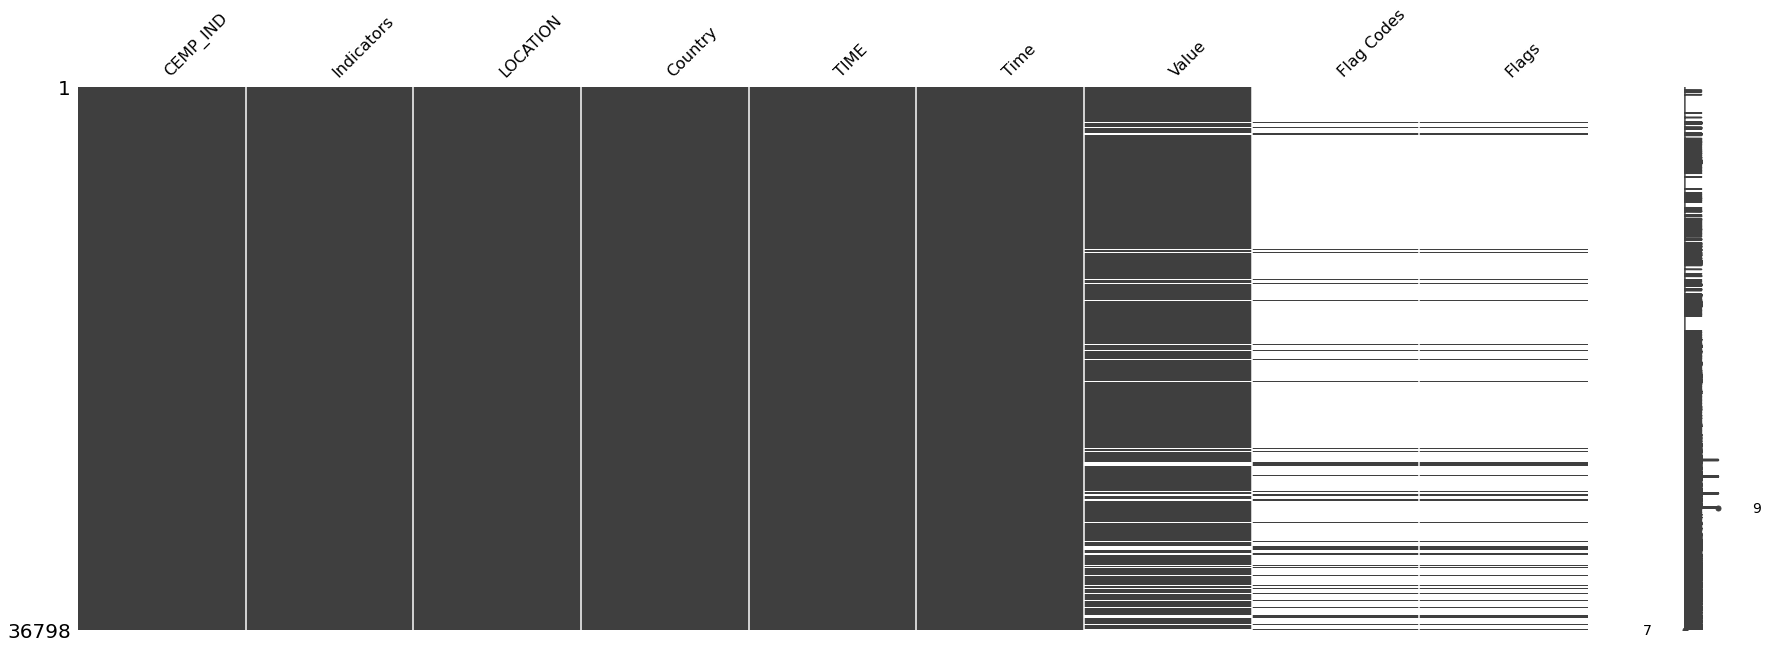

In [68]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [69]:
# we are going to check the exact percentage of all the values missing. 
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

21.314262248552154

In [70]:
# creating a temporary 
temp_df = df
# we have decided to drop the two columns because out of 36798 a mojority of 33814 from these two columns are missing
# leaving only 2984 values included.
# 21% of the data is missing which is pretty much a lot
temp_df.drop('Flag Codes',axis='columns', inplace=True)
temp_df.drop('Flags',axis='columns', inplace=True)

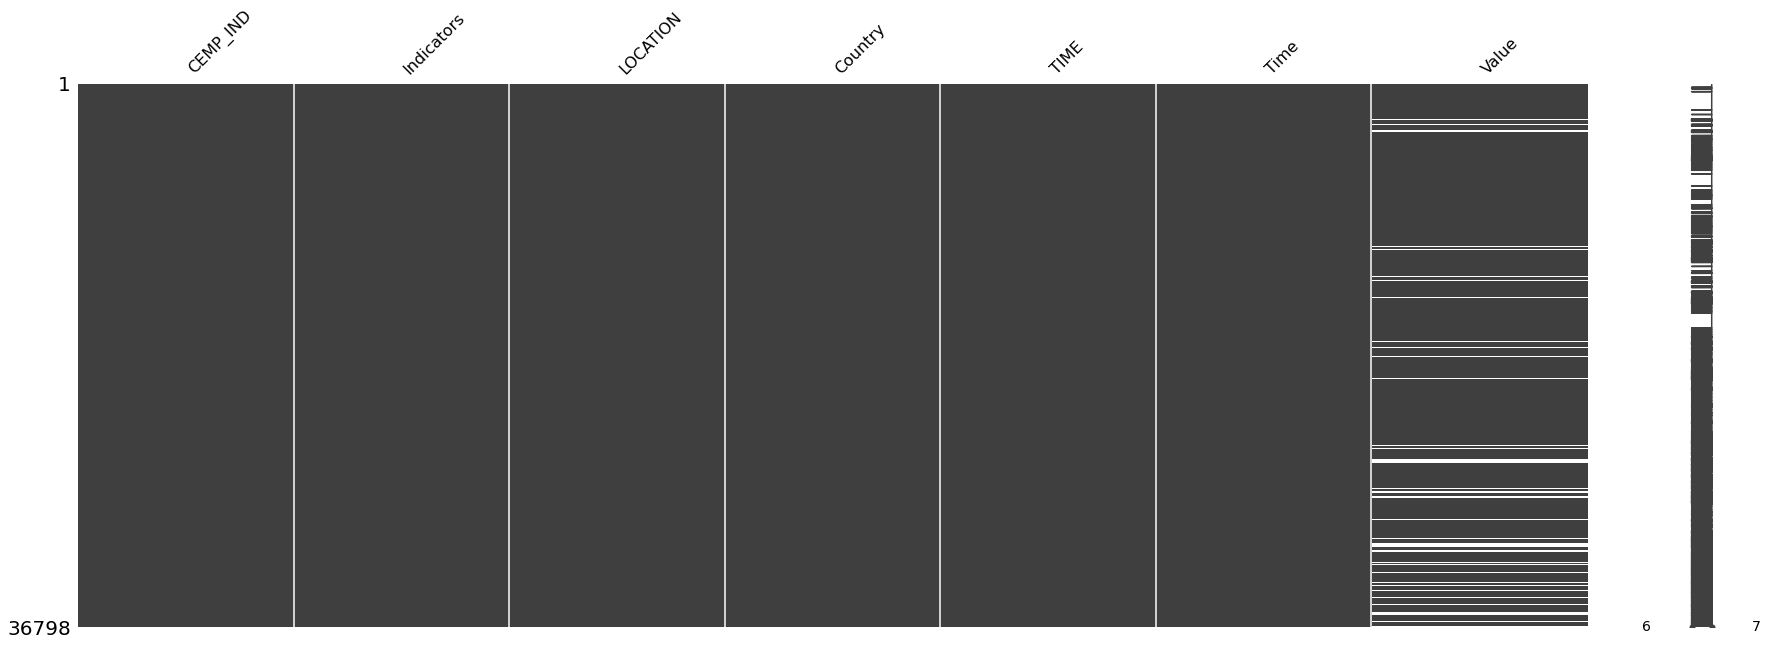

In [71]:
# Plot graphic of missing values
missingno.matrix(temp_df, figsize = (30,10))

Pakistan         816
Panama           816
Mexico           816
Sweden           810
Ecuador          791
                ... 
Maldives         119
Angola            92
Colombia          61
Argentina         52
Liechtenstein     30
Name: Country, Length: 77, dtype: int64


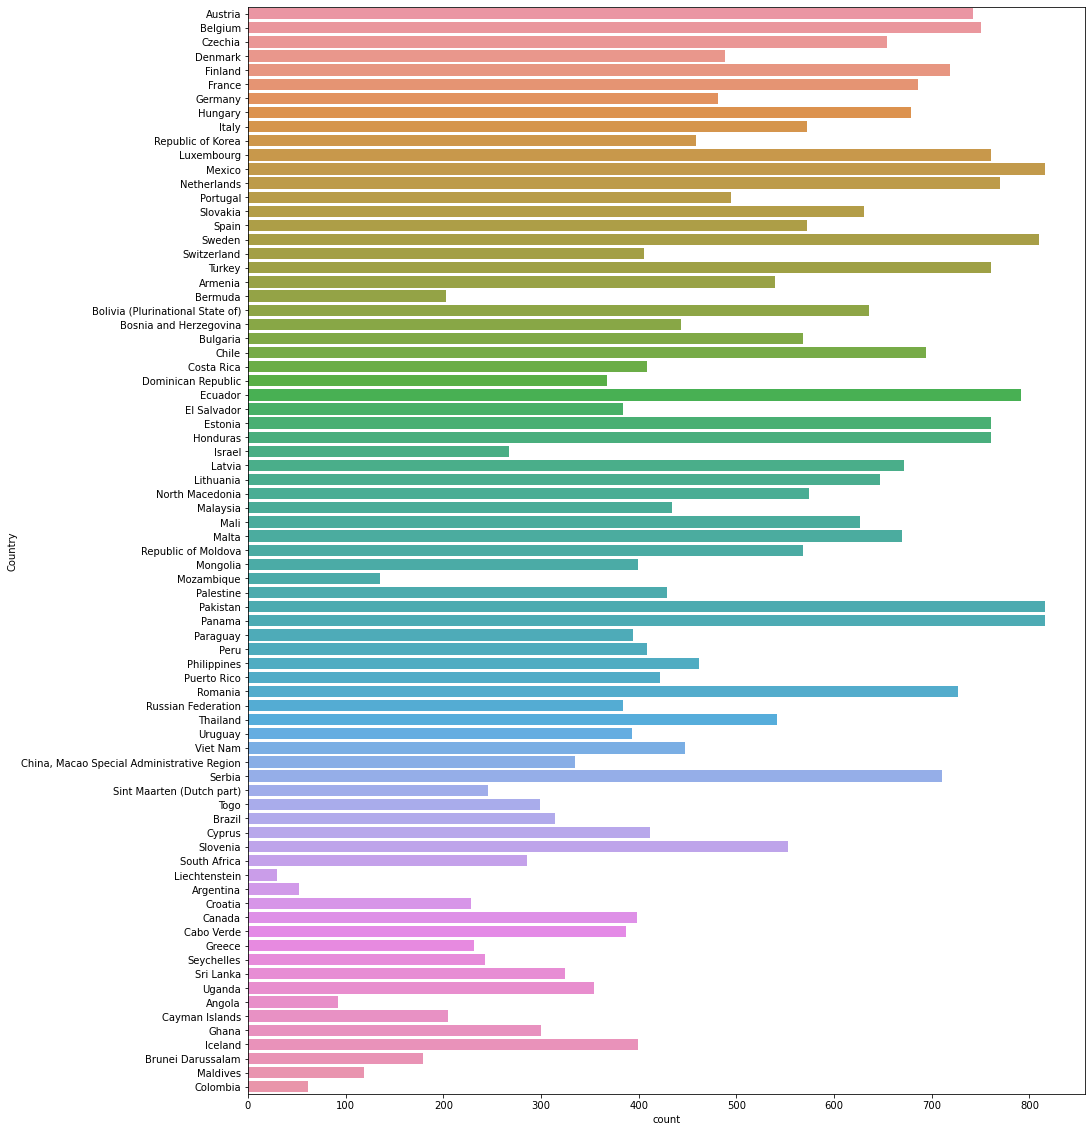

In [72]:
# How many countries have employment
fig = plt.figure(figsize=(15,20))
sns.countplot(y='Country', data=temp_df);
print(temp_df.Country.value_counts())

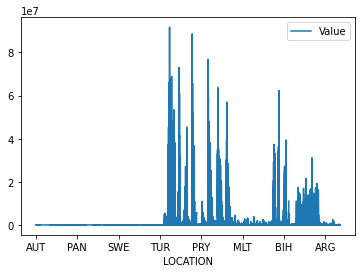

In [95]:
# how many people are employed per location
temp_df.plot(x="LOCATION", y="Value")

C:\Users\kunen\anaconda3\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_point : Removed 2961 rows containing missing values.


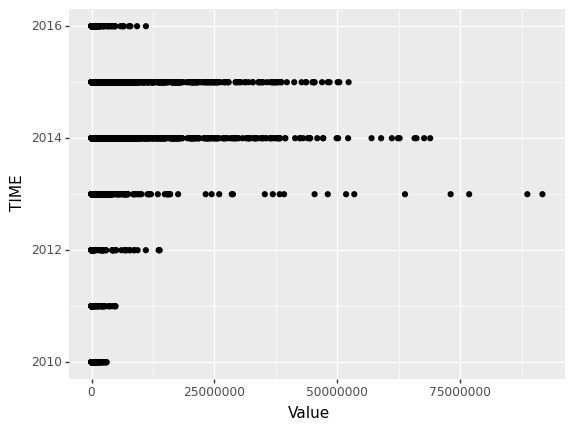

<ggplot: (132802934522)>

In [75]:
# Checking the number of people employed over TIME
ggplot(df) + aes(x="Value", y="TIME") + geom_point()

C:\Users\kunen\anaconda3\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_point : Removed 2961 rows containing missing values.


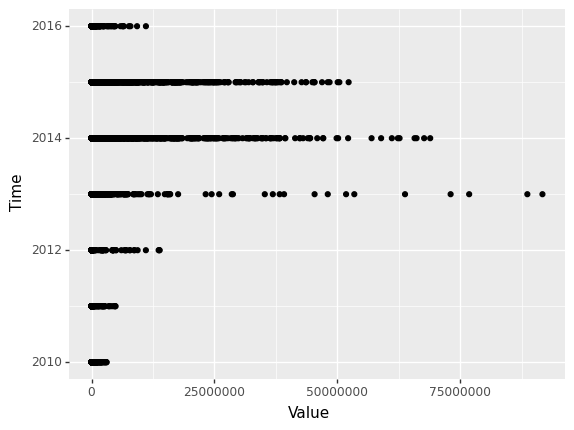

<ggplot: (132810633123)>

In [76]:
# Checking the number of people employed over time
ggplot(df) + aes(x="Value", y="Time") + geom_point()

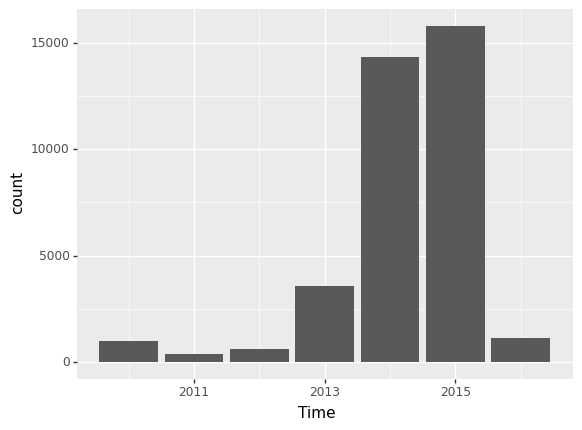

<ggplot: (132804295108)>

In [86]:
#showing the time
ggplot(df) + aes(x="Time") + geom_bar()